## Mushroom

Kaggle's Mushroom Classification. Aim is to detect edible mushrooms. More info <a href="https://www.kaggle.com/uciml/mushroom-classification">here.</a>

### Table of Contents

1. [Imports](#Imports)    
2. [Data](#Data)  
  2.1 [Import Data](#Import_Data)   
  2.2 [Missing Values](#Missing_Values)  
3. [EDA](#EDA)  
  3.1 [Target](#Target)  
  3.2 [Features](#Features)  
4. [Preprocess](#Preprocess)
5. [Models](#Models)  
  5.1 [Logistic Regression](#Logistic_Regression)  
  5.2 [KNN](#KNN)  
  5.3 [SVM](#SVM)  
  5.4 [Gaussian Naive Bayes](#Gaussian_Naive_Bayes)  
  5.5 [Decision Tree](#Decision_Tree)  
  5.6 [Random Forest](#Random_Forest)  
  5.7 [CatBoost](#CatBoost)
6. [Evaluation](#Evaluation)  

### Imports

In [1]:
# main
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

# datetimes
import datetime as dt
from datetime import datetime
import time

# dataviz
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# plot style
%config InteractiveShellApp.pylab_import_all = False
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)

plt.style.use('seaborn-colorblind')

# outline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%precision %.3f

# pandas display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data

#### Import_Data

In [2]:
df = pd.read_csv('../data/mushrooms.csv')

In [3]:
# data available
len(df)

8124

In [4]:
df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


Attribute Information: 

(classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s  
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s  
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y  
- bruises: bruises=t,no=f  
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s  
- gill-attachment: attached=a,descending=d,free=f,notched=n  
- gill-spacing: close=c,crowded=w,distant=d  
- gill-size: broad=b,narrow=n  
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y  
- stalk-shape: enlarging=e,tapering=t  
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?  
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s  
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s  
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
- veil-type: partial=p,universal=u  
- veil-color: brown=n,orange=o,white=w,yellow=y  
- ring-number: none=n,one=o,two=t  
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z  
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y  
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y  
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d  

#### Missing_Values

In [5]:
df.isna().mean()

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

### EDA

In [6]:
class_map = {'e': 'edible', 'p': 'poisonous'}
shape_map = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobed', 's': 'sunken', 'e': 'enlarging', 't': 'tapering'}
surface_map = {'f': 'fibrous','g': 'grooves', 'y': 'scaly', 's': 'smooth', 'k': 'silky'}
color_map = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
             'w': 'white', 'y': 'yellow', 'h': 'chocolate', 'k': 'black', 'o': 'orange'}
odor_map = {'a': 'almond','l': 'anise','c': 'creosote','y': 'fishy','f': 'foul', 'm': 'musty','n': 'none','p': 'pungent','s': 'spicy'}

df['class'] = df['class'].map(class_map)
df['bruises'] = df['bruises'].map({'t': 'bruises', 'f': 'no'})
df['odor'] = df['odor'].map(odor_map)
df['gill-attachment'] = df['gill-attachment'].map({'a':'attached','d':'descending','f':'free','n':'notched'})
df['gill-spacing'] = df['gill-spacing'].map({'c':'close','w':'crowded','d':'distant'})
df['gill-size'] = df['gill-size'].map({'b':'broad','n':'narrow'})
df['stalk-root'] = df['stalk-root'].map({'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted','?':'missing'})
df['veil-type'] = df['veil-type'].map({'p':'partial','u':'universal'})
df['ring-number'] = df['ring-number'].map({'n':'none','o':'one','t':'two'})
df['ring-type'] = df['ring-type'].map({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'})
df['population'] = df['population'].map({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'})
df['habitat'] = df['habitat'].map({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'})
    
for col in ['cap-shape','stalk-shape']:
    df[col] = df[col].map(shape_map)

for col in ['cap-surface','stalk-surface-above-ring','stalk-surface-below-ring']:
    df[col] = df[col].map(surface_map)

color_cols = [col for col in df.columns if 'color' in col]
for col in color_cols:
    df[col] = df[col].map(color_map)
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [7]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Target

In [8]:
df['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

#### Features

In [11]:
from utils.plot_utils import *

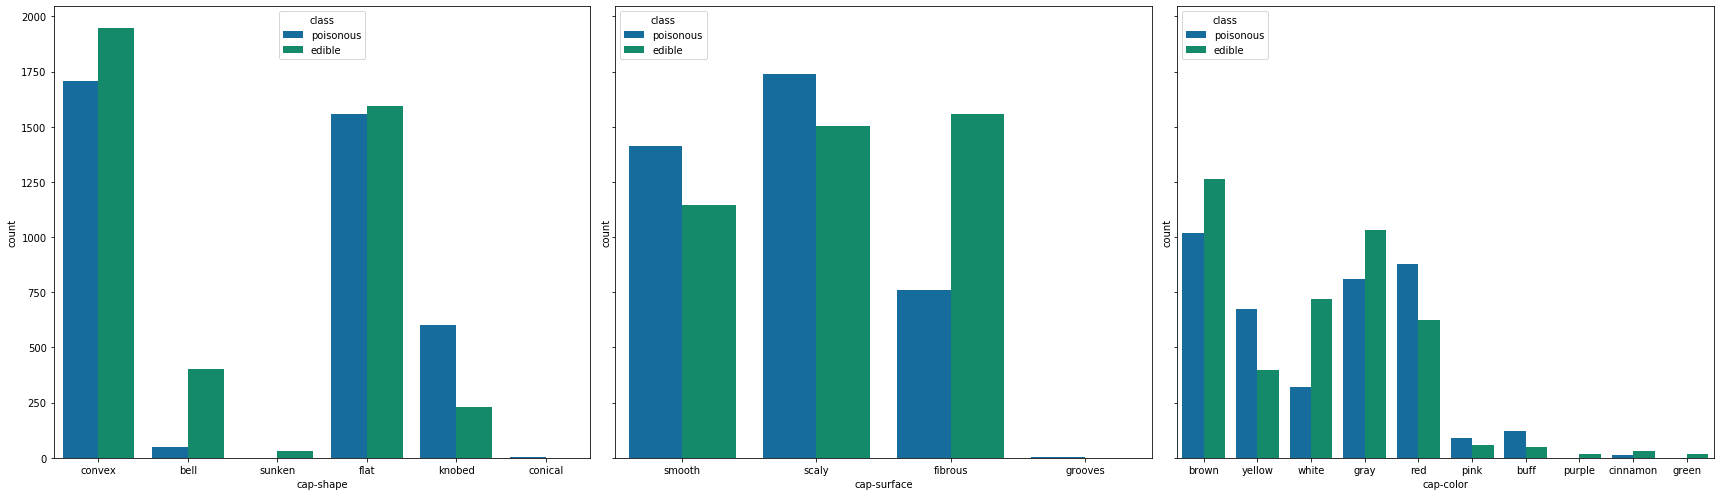

In [12]:
# Cap

countplots_with_multiple_categories(df,'class','cap')

<Figure size 720x504 with 0 Axes>

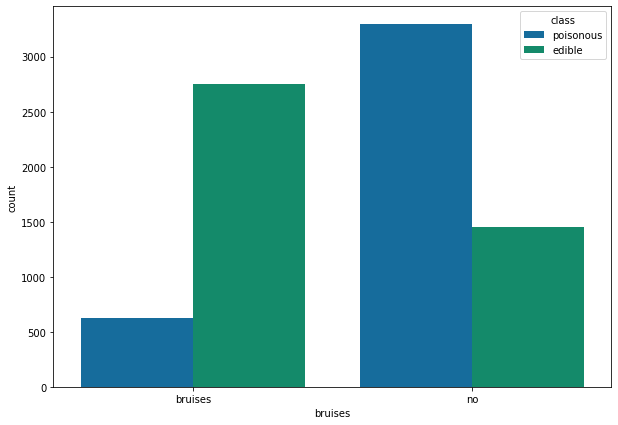

In [13]:
# Bruises

plt.figure(figsize=(10,7))
sns.countplot(x='bruises', hue='class', data=df)

<Figure size 720x504 with 0 Axes>

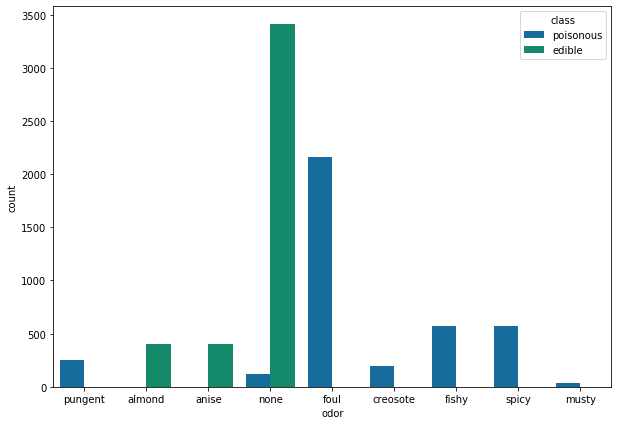

In [14]:
# Odor

plt.figure(figsize=(10,7))
sns.countplot(x='odor', hue='class', data=df)

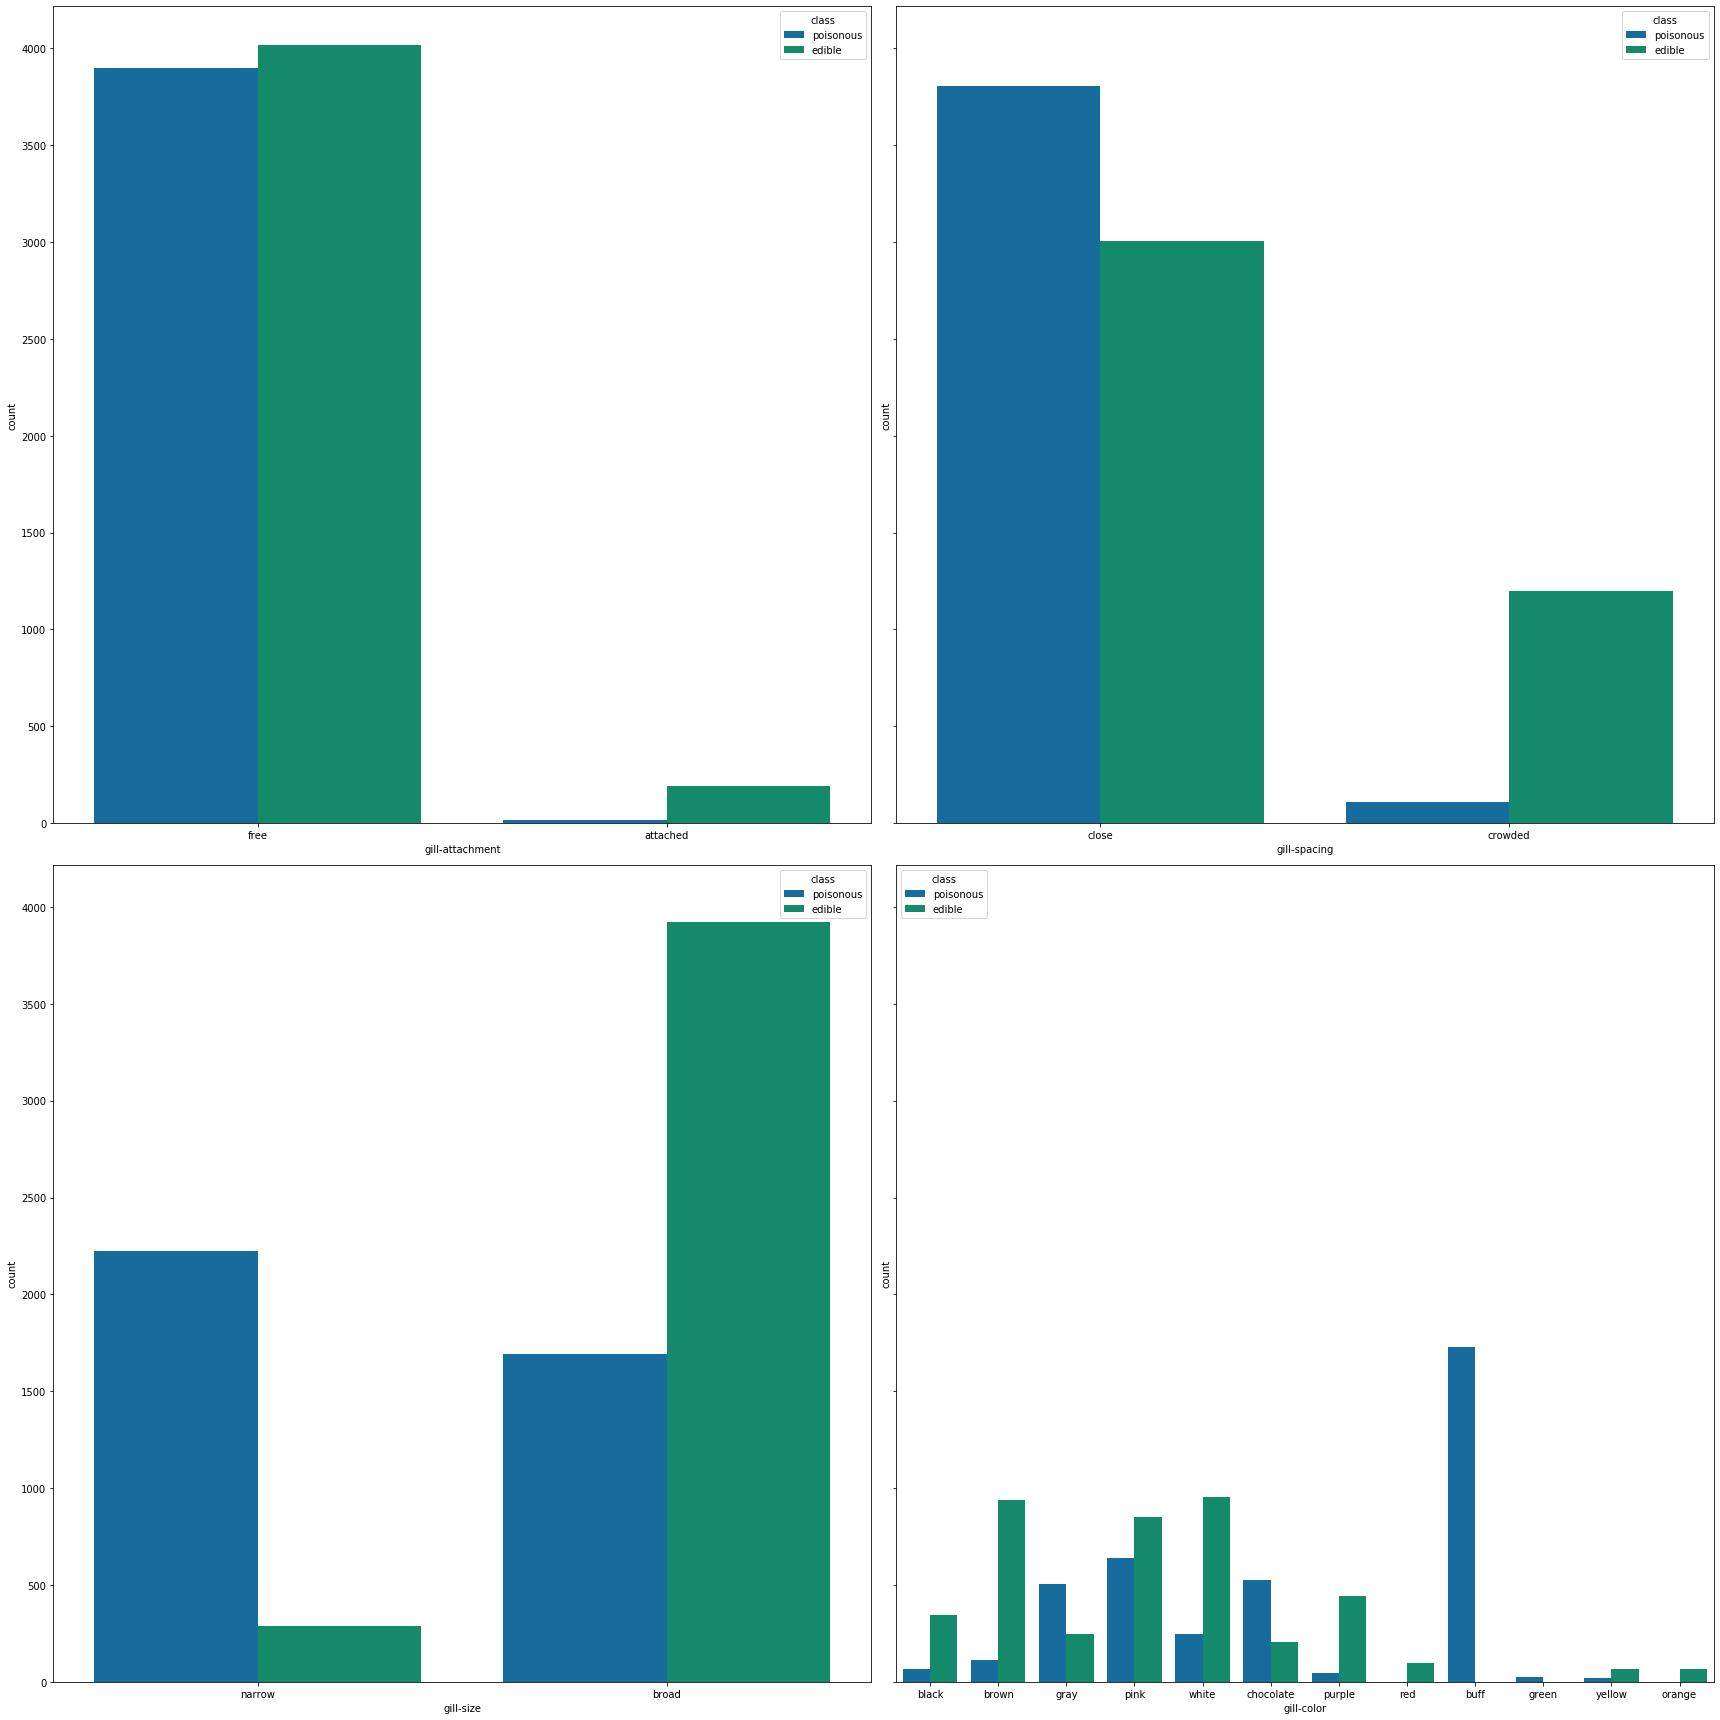

In [15]:
# Gill

countplots_with_multiple_categories(df,'class','gill')

<Figure size 720x504 with 0 Axes>

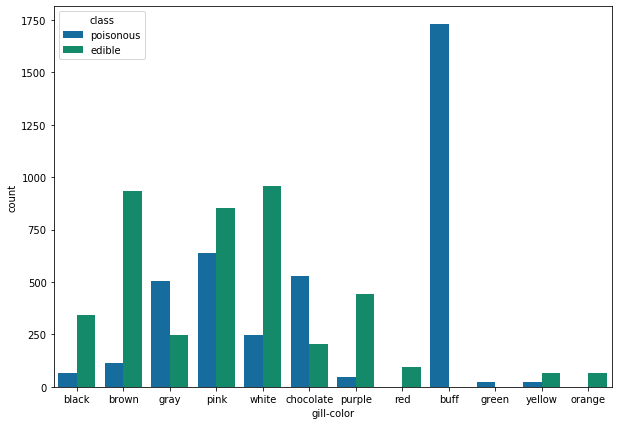

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x='gill-color', hue='class', data=df)

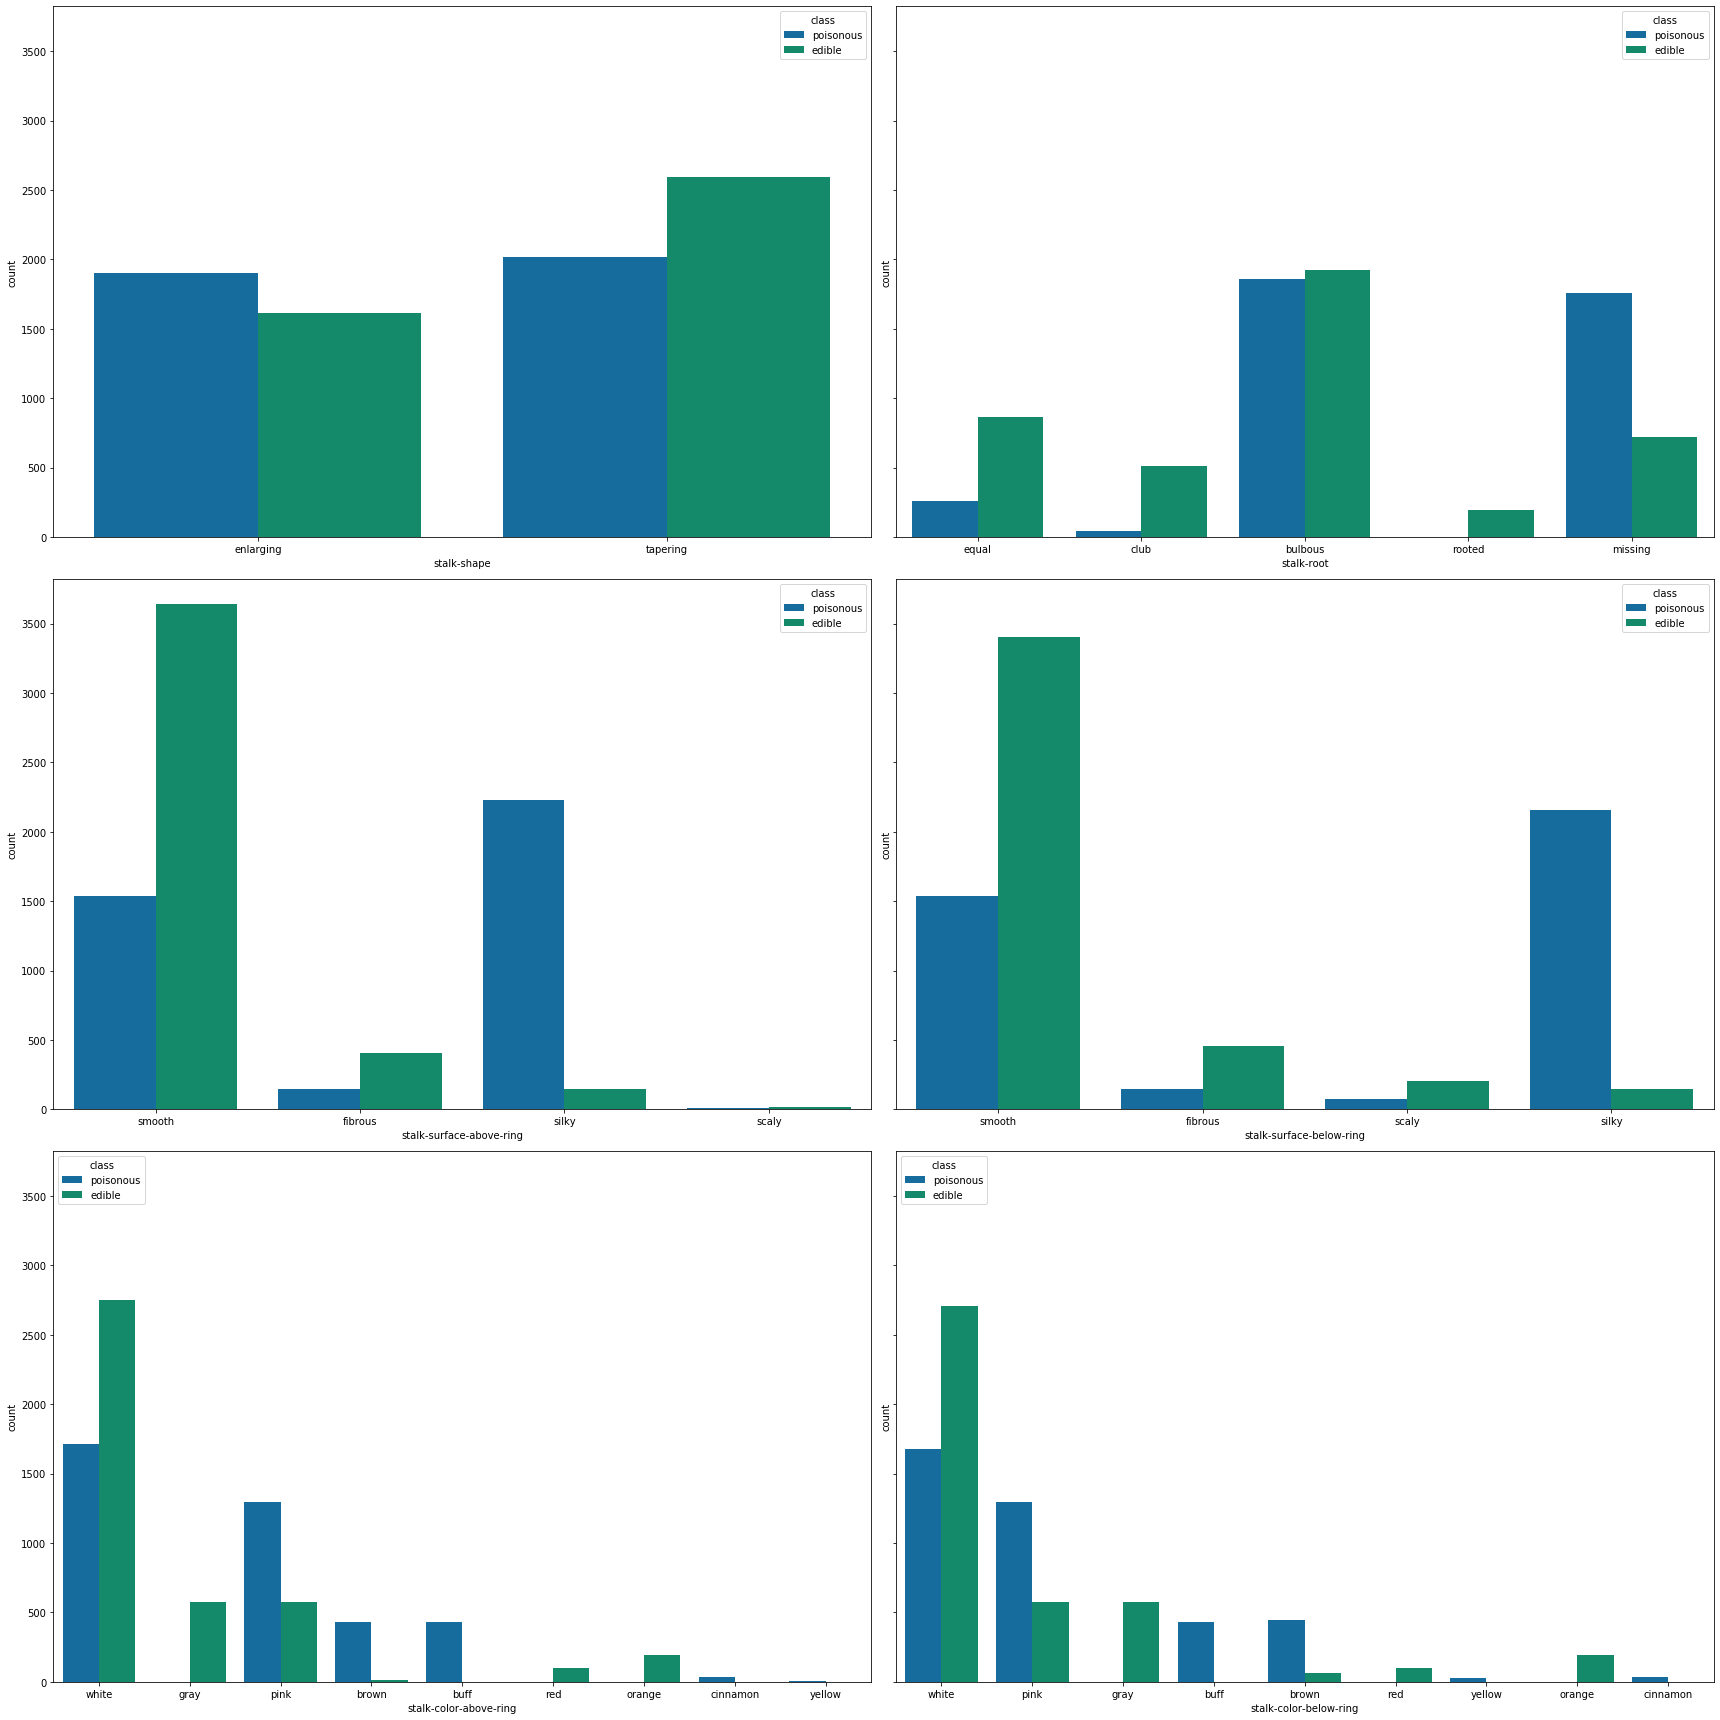

In [17]:
# Stalk

countplots_with_multiple_categories(df,'class','stalk')

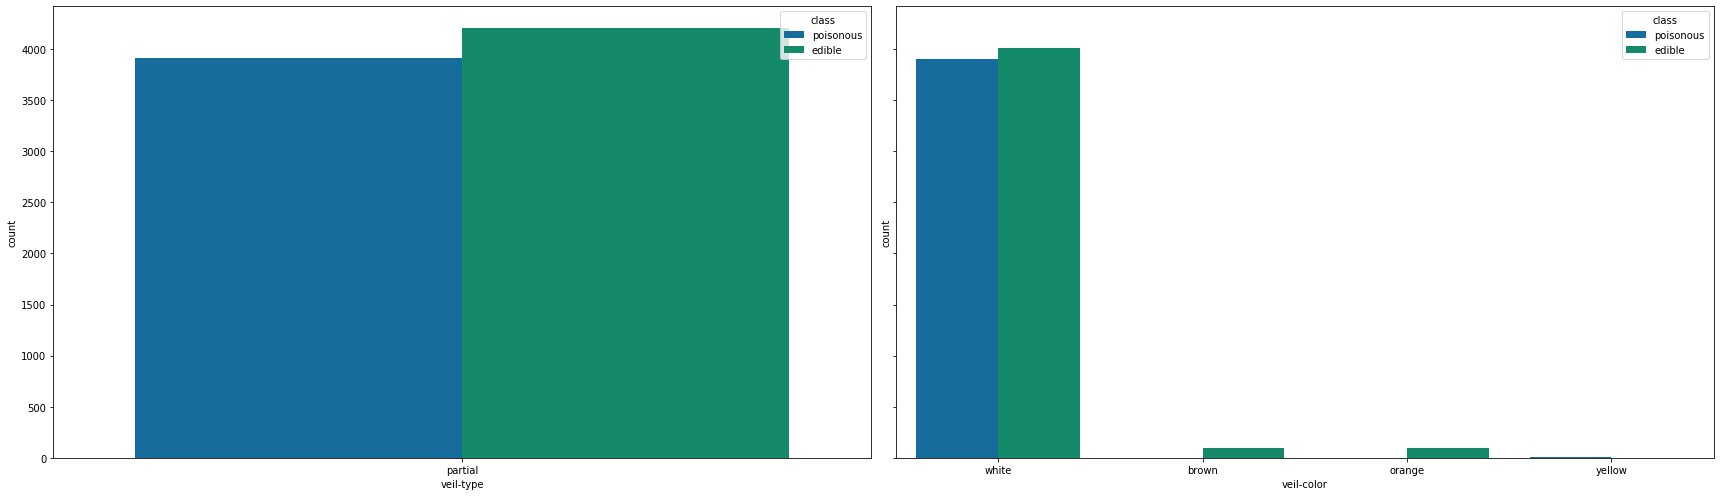

In [18]:
# Veil

countplots_with_multiple_categories(df,'class','veil')

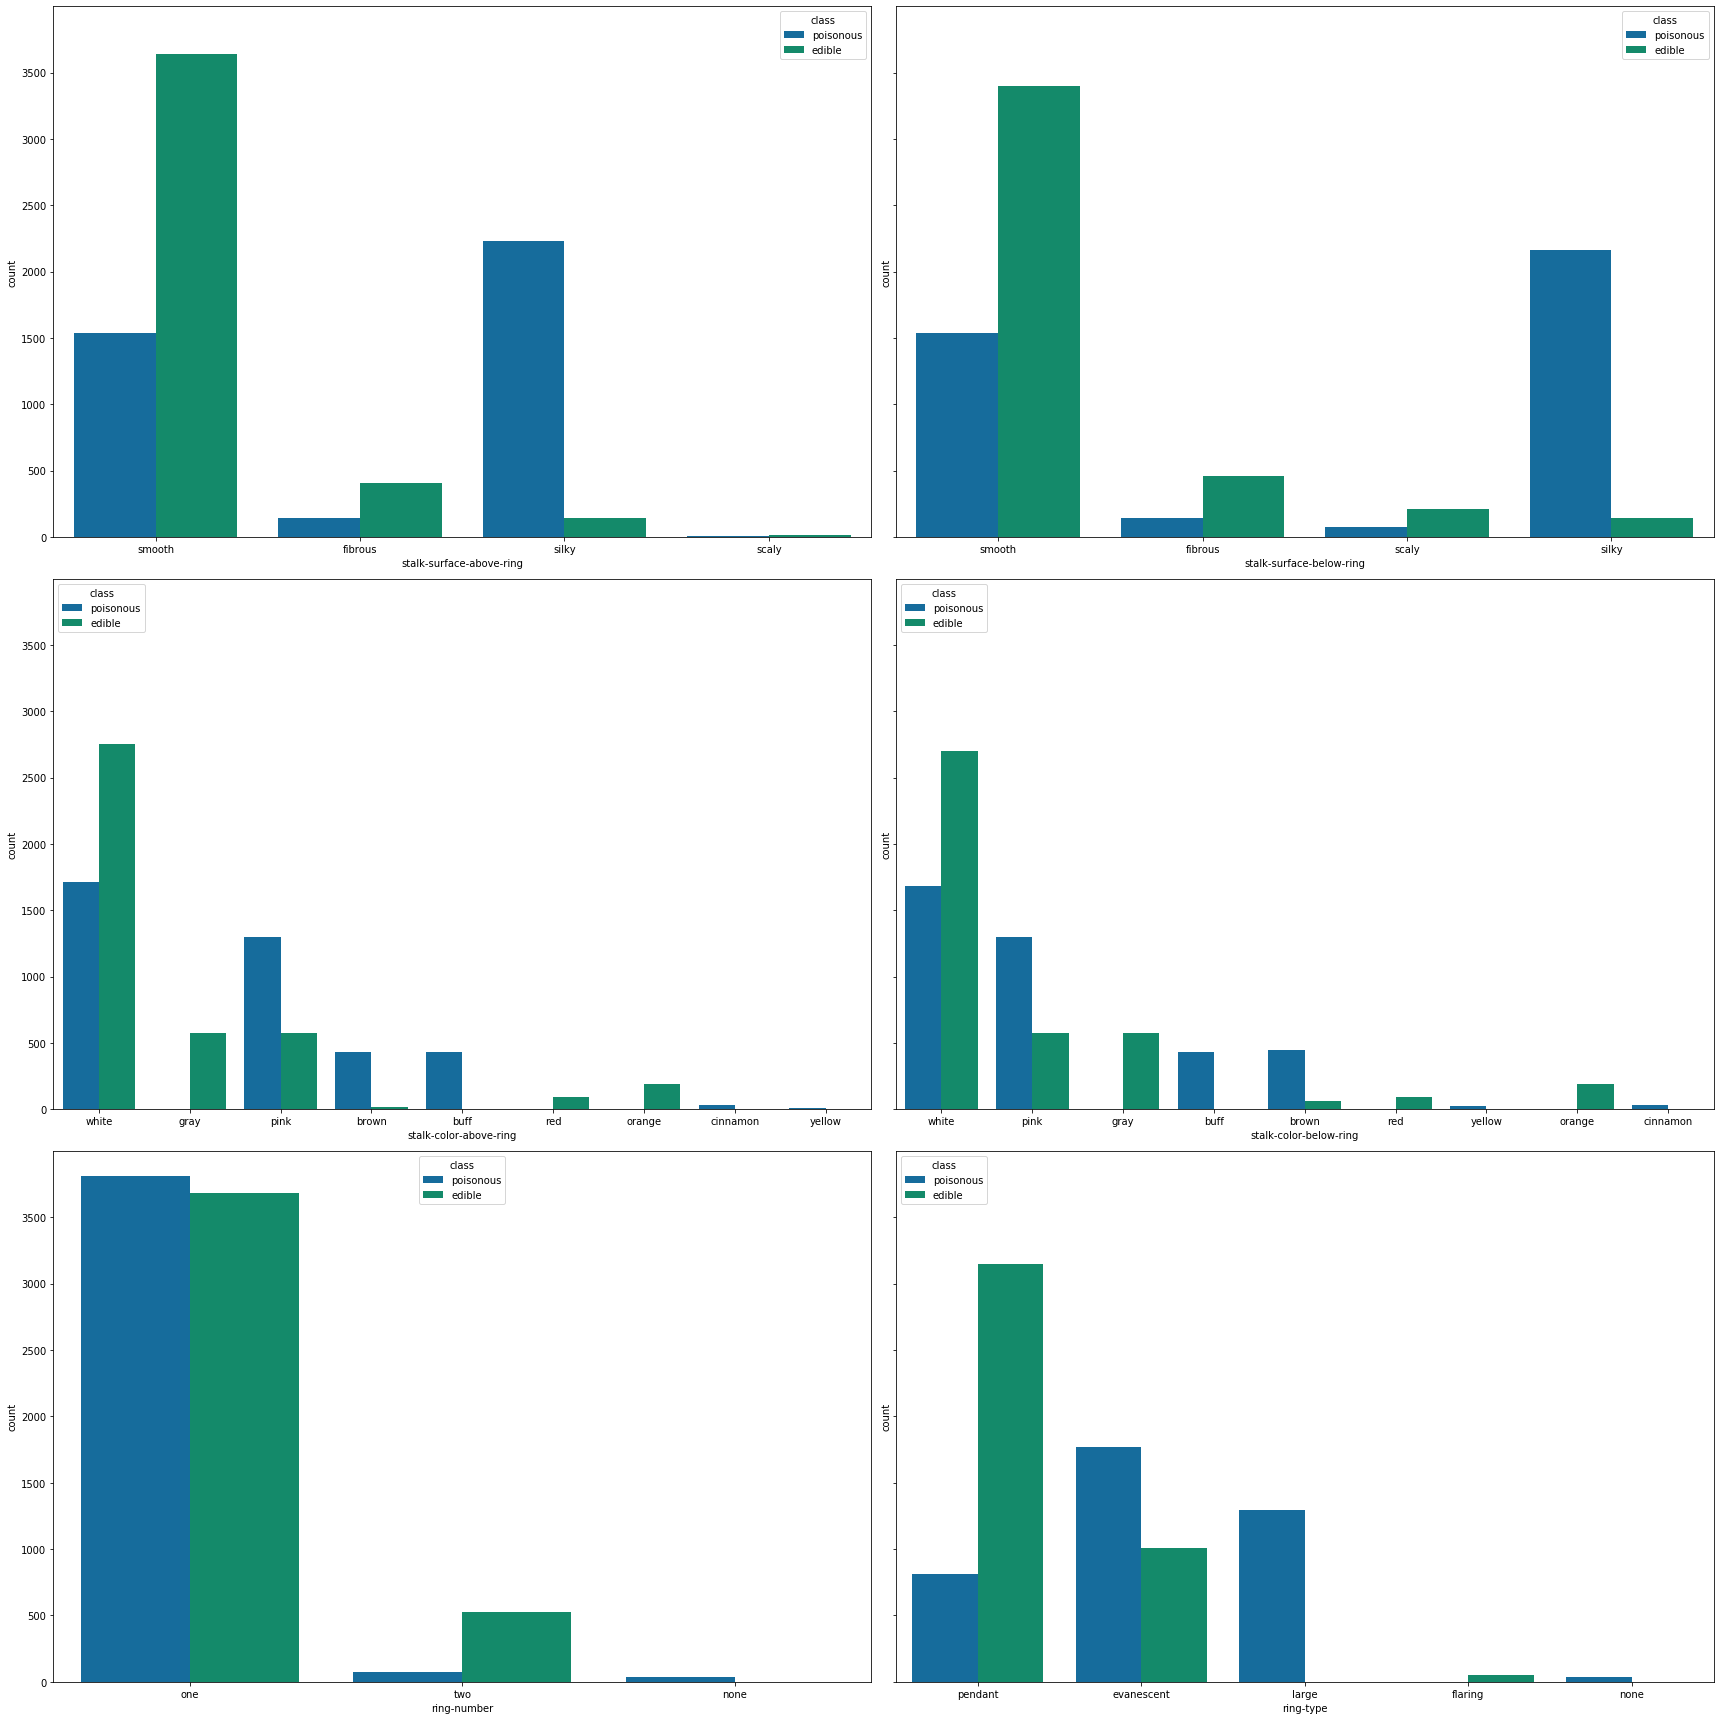

In [19]:
# Ring

countplots_with_multiple_categories(df,'class','ring')

<Figure size 720x504 with 0 Axes>

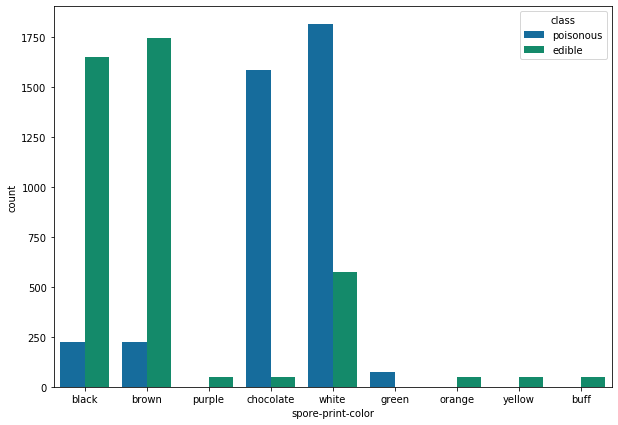

In [20]:
# Spore

plt.figure(figsize=(10,7))
sns.countplot(x='spore-print-color', hue='class', data=df)

<Figure size 720x504 with 0 Axes>

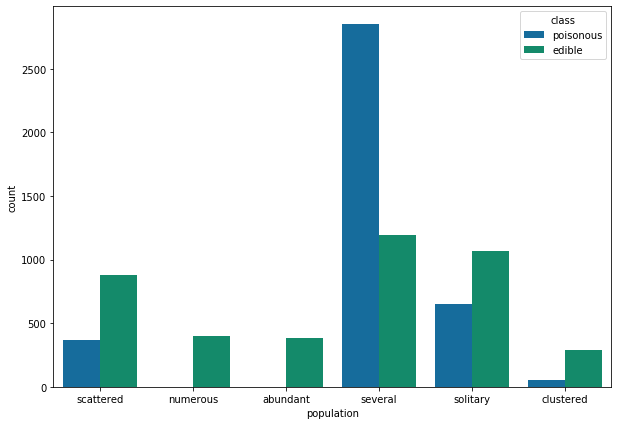

In [21]:
# Population

plt.figure(figsize=(10,7))
sns.countplot(x='population', hue='class', data=df)

<Figure size 720x504 with 0 Axes>

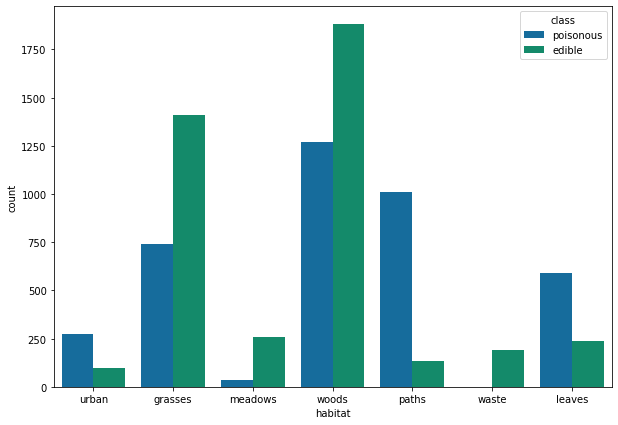

In [22]:
# Habitat

plt.figure(figsize=(10,7))
sns.countplot(x='habitat', hue='class', data=df)

### Preprocess

In [32]:
# separate target and features

X=df.drop('class',axis=1)
y=df['class']

In [33]:
# encode

from sklearn.preprocessing import LabelEncoder

Encoder_X = LabelEncoder() 

for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
    
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

X.head()
y

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,2,3,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,1,3,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,1,3,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,2,3,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,2,3,3,7,7,0,2,1,0,1,0,0


array([1, 0, 0, ..., 0, 1, 0])

In [34]:
# get dummies

X=pd.get_dummies(X,columns=X.columns,drop_first=True)

X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,stalk-shape_1,stalk-root_1,stalk-root_2,stalk-root_3,stalk-root_4,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-above-ring_3,stalk-surface-below-ring_1,stalk-surface-below-ring_2,stalk-surface-below-ring_3,stalk-color-above-ring_1,stalk-color-above-ring_2,stalk-color-above-ring_3,stalk-color-above-ring_4,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Models

Try followings for this binary classification problem:

- Logistic Regression
- KNN
- SVM
- Gaussian Naive Bayes Classifier
- Decision Tree
- Random Forrest
- CatBoost Classifier

In [37]:
from sklearn.model_selection import GridSearchCV

#### Logistic_Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# hyperparameters to tune
penalty = ['l1', 'l2']
C = [0.001,.009,0.01,.09,1,5,10,25]
class_weight = ['balanced', None]
solver = ['lbfgs', 'liblinear']

# hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, class_weight=class_weight, solver=solver)

 
# cross-validation
lr = GridSearchCV(estimator=LogisticRegression(), param_grid=hyperparameters, cv=10)

# best model
lr.fit(X_train, y_train)

# best model params
lr.best_params_

# predict using best model
lr_preds = lr.predict(X_test)
score_lr = lr.score(X_train, y_train)
score_lr

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbo

{'C': 0.090, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

0.9996482588814632

#### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# hyperparameters to tune
leaf_size = [10,15,30,50]
n_neighbors = [3,5,10,15,30]
weights = ['uniform','distance']
p = [1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# hyperparameter options
hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,weights=weights,p=p,algorithm=algorithm)

# cross-validation
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=hyperparameters, cv=10)

# best model
knn.fit(X_train, y_train)

# best model params
knn.best_params_

# predict using best model
knn_preds = knn.predict(X_test)
score_knn = knn.score(X_train, y_train)
score_knn

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 30, 50],
                         'n_neighbors': [3, 5, 10, 15, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

1.0

#### SVM

In [40]:
from sklearn.svm import SVC

# hyperparameters to tune
C = [0.5,1,2]
kernel = ['linear', 'rbf']
gamma = [0.02, 0.05]

# hyperparameter options
hyperparameters = dict(C=C,kernel=kernel,gamma=gamma)

# cross-validation
svc = GridSearchCV(estimator=SVC(), param_grid=hyperparameters, cv=10)

# best model
svc.fit(X_train, y_train)

# best model params
svc.best_params_

# predict using best model
svc_preds = svc.predict(X_test)
score_svc = svc.score(X_train, y_train)
score_svc


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 2], 'gamma': [0.02, 0.05],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'C': 0.500, 'gamma': 0.020, 'kernel': 'linear'}

1.0

#### Gaussian_Naive_Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

# fit model
gs = GaussianNB()
gs.fit(X_train, y_train)
gs_preds = gs.predict(X_test)
score_gs = gs.score(X_train, y_train)
score_gs

GaussianNB(priors=None, var_smoothing=1e-09)

0.9945480126626802

#### Decision_Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# hyperparameters to tune
criterion = ['gini','entropy']
splitter = ['best', 'random']
max_depth = [2,4,6,8,None]
min_samples_leaf = [1,3,5,7,10]

# hyperparameter options
hyperparameters = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf)

# cross-validation
dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=hyperparameters, cv=10)

# best model
dt.fit(X_train, y_train)

# best model params
dt.best_params_

# predict using best model
dt_preds = dt.predict(X_test)
score_dt = dt.score(X_train, y_train)
score_dt


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'splitter': 'best'}

1.0

#### Random_Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameters to tune
n_estimators = [100,300]
criterion = ['gini','entropy']
max_depth = [4,8]
max_features = [3,'auto']
min_samples_split = [3,7,10]

# hyperparameter options
hyperparameters = dict(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split)

# cross-validation
rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyperparameters, cv=10)

# best model
rf.fit(X_train, y_train)

# best model params
rf.best_params_

# predict using best model
rf_preds = rf.predict(X_test)
score_rf = rf.score(X_train, y_train)
score_rf


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 100}

1.0

#### CatBoost

In [44]:
from catboost import CatBoostClassifier

# hyperparameters to tune
learning_rate = [0.01,0.05,0.1,0.5]
loss_function = ['Logloss', 'CrossEntropy']
l2_leaf_reg = [2,10,25]

# hyperparameter options
hyperparameters = dict(learning_rate=learning_rate,loss_function=loss_function,l2_leaf_reg=l2_leaf_reg)

# cross-validation
cb = GridSearchCV(estimator=CatBoostClassifier(eval_metric='Accuracy',iterations=300), param_grid=hyperparameters, cv=10)

# best model
cb.fit(X_train, y_train, logging_level='Silent')

# best model params
cb.best_params_

# predict using best model
cb_preds = cb.predict(X_test)
score_cb = cb.score(X_train, y_train)
score_cb


GridSearchCV(cv=10, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x1a1ee12b10>,
             iid='deprecated', n_jobs=None,
             param_grid={'l2_leaf_reg': [2, 10, 25],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss_function': ['Logloss', 'CrossEntropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'l2_leaf_reg': 2, 'learning_rate': 0.100, 'loss_function': 'Logloss'}

1.0

### Evaluation

In [45]:
# evaluate classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# evaluate on

# accuracy = TP + TN / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)  aka sensitivity, or true positive rate
# f1 = 2 * precision * recall / (precision + recall) 

In [46]:
models = pd.DataFrame({    
    'Model': [
        'Logistic Regression',
        'KNN', 
        'SVM',
        'Gaussian Naive Bayes',
        'Decision Tree',
        'Random Forest',
        'CatBoost'
              ],
    
    'Accuracy_Score':[
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, knn_preds),
        accuracy_score(y_test, svc_preds),
        accuracy_score(y_test, gs_preds),
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, cb_preds)
                     ],
    
    'Precision': [
        precision_score(y_test, lr_preds),
        precision_score(y_test, knn_preds),
        precision_score(y_test, svc_preds),
        precision_score(y_test, gs_preds),
        precision_score(y_test, dt_preds),
        precision_score(y_test, rf_preds),
        precision_score(y_test, cb_preds)
                ],
    
    'Recall': [
        recall_score(y_test, lr_preds),
        recall_score(y_test, knn_preds),
        recall_score(y_test, svc_preds),
        recall_score(y_test, gs_preds),
        recall_score(y_test, dt_preds),
        recall_score(y_test, rf_preds),
        recall_score(y_test, cb_preds)
                ],
    
    'F1_Score': [
        f1_score(y_test, lr_preds),
        f1_score(y_test, knn_preds),
        f1_score(y_test, svc_preds),
        f1_score(y_test, gs_preds),
        f1_score(y_test, dt_preds),
        f1_score(y_test, rf_preds),
        f1_score(y_test, cb_preds)
                ],
})

models

,Model,Accuracy_Score,Precision,Recall,F1_Score
0,Logistic Regression,0.999590,1.000000,0.999153,0.999576
1,KNN,1.000000,1.000000,1.000000,1.000000
2,SVM,1.000000,1.000000,1.000000,1.000000
3,Gaussian Naive Bayes,0.991386,0.983333,0.999153,0.991180
4,Decision Tree,1.000000,1.000000,1.000000,1.000000
5,Random Forest,1.000000,1.000000,1.000000,1.000000
6,CatBoost,1.000000,1.000000,1.000000,1.000000
